# DATA2001 Assignment 2

Name: Erik Flink

Student Number: s46267445

In [1]:
# import pandas library using alias pd
import pandas as pd
import numpy as np

dataset = pd.read_csv(filepath_or_buffer='dataset.csv')

## 1. Data Preparation

### Create Subset

In [2]:
# Create a subset of the dataset containing only Id, Score and Text
data = dataset[['Id', 'Score', 'Text']]
data.head()

,Id,Score,Text
0,2,1,Product arrived labeled as Jumbo Salted Peanut...
1,5,5,Great taffy at a great price. There was a wid...
2,10,5,This is a very healthy dog food. Good for thei...
3,17,2,I love eating them and they are good for watch...
4,39,4,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...


In [3]:
# Determine if there are any inconsistencies in the data
data["Score"].unique()

array([1, 5, 2, 4, 3])

Score column is consistent

### Allocate sentiment value 

Scores equal to 3 will be dropped as the sentiment values being labeled to rows will either be positive or negative, as 3 is the middle number between 1 and 5 it can't be either positive or negative.

In [4]:
# Drops Scores equal to 3
data.drop(data[data.Score == 3].index, inplace=True)

data["Score"].unique()

/tmp/ipykernel_138320/1936775015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data.Score == 3].index, inplace=True)


array([1, 5, 2, 4])

Above we can see that there are no more Score values equal to 3. 

In [5]:
# Create a new column Label based on the condition that scores eqaul to or greater than 4 are positive and 
# scores under 4 are negative.
data['Label'] = np.where(data['Score'] >= 4, "Pos", "Neg")
data.head()

/tmp/ipykernel_138320/1603206132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = np.where(data['Score'] >= 4, "Pos", "Neg")


,Id,Score,Text,Label
0,2,1,Product arrived labeled as Jumbo Salted Peanut...,Neg
1,5,5,Great taffy at a great price. There was a wid...,Pos
2,10,5,This is a very healthy dog food. Good for thei...,Pos
3,17,2,I love eating them and they are good for watch...,Neg
4,39,4,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...,Pos


The table above shows that the label column has been implemented correctly according to the score column, this can be seen as all score values 1,2,4, and 5 can be observed in the table above with their correctly assigned label.

### Summary

In [6]:
# Get the number of Removed reviews
removed = dataset.shape[0] - data.shape[0]
# Determine what percentage of the original rows were removed
(removed / dataset.shape[0]) * 100

7.610736044788408

Although removing scores equal to 3 allows the data set to be easily labeled positive or negative, we can observe above that 7.6% of the rows were removed. This is okay since we understand what data is missing.

In [7]:
data["Label"].describe()

count     28054
unique        2
top         Pos
freq      23228
Name: Label, dtype: object

We can see above that there are 23228 rows with Positive reviews meaning that there are a remaining 4826 rows with negative reviews, showing a significantly higher number of positive reviews compared to negative.

In [8]:
data["Score"].describe()

count    28054.000000
mean         4.233122
std          1.373777
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Score, dtype: float64

This significant skew in the data is seen above in the Scores column, showing why there is such difference in frequency between the positive and negative reviews.

## 2. Data Cleaning

### Text Exploration

Review texts will be explored to see what isn't necessary when analysing the data. Below are a few text reviews that stood out as they had useless bits of information.

In [9]:
data.loc[4, "Text"]

'I WAS VISITING MY FRIEND NATE THE OTHER MORNING FOR COFFEE , HE CAME OUT OF HIS STORAGE ROOM WITH ( A PACKET OF McCANNS INSTANT IRISH OATMEAL .) HE SUGGESTED THAT I TRY IT FOR MY OWN USE ,IN MY STASH . SOMETIMES NATE DOSE NOT GIVE YOU A CHANCE TO SAY NO , SO I ENDED UP TRYING THE APPLE AND CINN . FOUND IT TO BE VERY TASTEFULL WHEN MADE WITH WATER OR POWDERED MILK . IT GOES GOOD WITH O.J. AND COFFEE AND A SLICE OF TOAST AND YOUR READY TO TAKE ON THE WORLD...OR THE DAY AT LEAST..  JERRY REITH...'

In [10]:
data.loc[5, "Text"]

"This wasn't in stock the last time I looked. I had to go to the Vermont Country Store in Weston to find it along with a jaw harp, Cranberry Horseradish Sauce, Fartless Black Bean Salsa, Apple Cider Jelly, Newton's Cradle Art in Motion and the staple Vermont Maple Syrup.<br /><br />Back to the Ass Kickin Peanuts. They are hot. They will activate the perspiration glands behind your ears and under your arms. It requires a beverage as advertised, a glass of very cold milk, and a box of Kleenex since it will make your nose run. They look like ordinary peanuts which is already giving me ideas for work. I suspect that some people have been hitting my goodies in my absence, especially my colleague Greg. I'm going to take this to work at earliest opportunity and empty the contents of this can into an ordinary Planters Peanuts can, and then see whose crying or whose nose is running when I return.<br /><br />The can should be shaken to ensure the spices are evenly distributed. It is important to

In [11]:
data.loc[6, "Text"]

"We roast these in a large cast iron pan on the grill (about 1/3 of the bag at a time).  The smell is wonderful and the roasted beans taste delicious too.  More importantly, the coffee is smooth; no bitter aftertaste.  On numerous occasions, we've had to send the roasted beans home with friends because they like it so much."

### Data Cleaning

Texts that contained a parenthesis had a pattern of describing scenarios that didn't contribute to the rating of the product, for this reason parenthesis and the information inside of it will be removed. The Text must follow regular expression (regex) to search for patterns. Row 5 also had HTML elements that need to be removed \<br>. Removal of weird characters that aren't need for regular expression (regex) will also be removed to help with pattern matching.

In [12]:
import re

def clean_text(text):
    
    # remove parenthesis and any information inside
    re.sub(r'\([^)]*\)', ' ', text)
    
    # remove instances of br from HTML elements
    text = text.replace("br", " ")
    
    # remove any weired characters that aren't useful for pattern matching
    text = re.sub(r"[^A-Za-z*'-]+", " ", text)
    
    # convert text to lowercase
    text = text.lower().strip()
    
    return text

In [13]:
data["Text"] = data["Text"].apply(clean_text)

/tmp/ipykernel_138320/4245509868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Text"] = data["Text"].apply(clean_text)


In [14]:
data.loc[4, "Text"]

'i was visiting my friend nate the other morning for coffee he came out of his storage room with a packet of mccanns instant irish oatmeal he suggested that i try it for my own use in my stash sometimes nate dose not give you a chance to say no so i ended up trying the apple and cinn found it to be very tastefull when made with water or powdered milk it goes good with o j and coffee and a slice of toast and your ready to take on the world or the day at least jerry reith'

Above we can see that there are no more parenthesis or any of the information that was in them. Uppercased letters are also not present any more as well as non regex characters.

In [15]:
data.loc[5, "Text"]

"this wasn't in stock the last time i looked i had to go to the vermont country store in weston to find it along with a jaw harp cranberry horseradish sauce fartless black bean salsa apple cider jelly newton's cradle art in motion and the staple vermont maple syrup back to the ass kickin peanuts they are hot they will activate the perspiration glands behind your ears and under your arms it requires a beverage as advertised a glass of very cold milk and a box of kleenex since it will make your nose run they look like ordinary peanuts which is already giving me ideas for work i suspect that some people have been hitting my goodies in my absence especially my colleague greg i'm going to take this to work at earliest opportunity and empty the contents of this can into an ordinary planters peanuts can and then see whose crying or whose nose is running when i return the can should be shaken to ensure the spices are evenly distributed it is important to wash your hands after consumption and n

Above we can also observe that there are no more HTML elements present.

## Data Analysis

## 3. Build a logistic regression text classifier

The bag of words model was used to represent the natural language as numeric values where we can then perform analysis.

As 70% of the reviews will be used for training and the other half for tests. The training data will be used to develop a text classification model, this will be done by correlating words that are present in texts to their 'pos' or 'neg' labels. 

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

# define random state to make random processes reproducible
random_state = np.random.RandomState(0)

In [17]:
# Define X(features) and y(target)
X = data["Text"]
y = data["Label"]

# split the data into train-test split where 30% of data will be used as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=random_state)

### Represent Text as bag of words

Stop words or words that aren't useful for identifying sentiments, are initially removed. We also filter words that aren't present in many reviews. We create a count vector that counts the frequency of each word then transforms that into the bag of words format.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  File 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/s4626744/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Remove Words that aren't useful for identifying sentiments.
stop_words = stopwords.words('english')

In [20]:
# define CountVectorizer object
# min_df=0.01 means words that belong to only 1% of the all texts will be excluded in the BOW
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), min_df=0.01)

# fit the vectorizer object to train data
vectorizer.fit(X_train)

# get the BOW for train data
X_train_BOW = vectorizer.transform(X_train)

In [21]:
# visualize BOW
training_data_BOW = pd.DataFrame(data=X_train_BOW.toarray(), columns=vectorizer.get_feature_names()).T

training_data_BOW.head(5)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,19627,19628,19629,19630,19631,19632,19633,19634,19635,19636
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
actually,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
add,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
added,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Above we can observe the range of frequency between words from the more to less occuring.

## 4. Logistic regression analysis

### Baseline Model

We identify the most frequent label in the data then assign that label to a while dataset to act as a reference point to draw comparisons with.

In [22]:
# identify most frequently occurring label in the train data
y_train.value_counts()

Pos    16234
Neg     3403
Name: Label, dtype: int64

In [23]:
# Assign Pos to dataset as it is the most frequent occuring value
y_test_baseline_predictions = pd.Series(['Pos']*len(y_test))

### Logistic regression model

The logistic regression model used will take the bag of words as input and will be used to predict whether the text has a 'Pos' or 'Neg' label. 

We will start with creating a logistic regression model and apply the bag of words derived from the training data and their corresponding labels to see which words correlate to 'pos' or 'neg' labels.

In [24]:
from sklearn.linear_model import LogisticRegression

# define logositic regression model object
# increase number of iterations to 102 instead of the default 100. This allows it to converge.
log_reg = LogisticRegression(random_state=random_state, max_iter=102)

# fit the model to training data
log_reg.fit(X_train_BOW, y_train)

LogisticRegression(max_iter=102,
                   random_state=RandomState(MT19937) at 0x7FFFA9049040)

After the logistic regression converges and we create the regression model, we will use the prediction function to predict whether the review text had a 'pos' or 'neg' label. This will then be used for evaulations of the logistic regression.

In [25]:
# create BOW for test data
X_test_BOW = vectorizer.transform(X_test)

# predict using log_reg object
y_test_log_reg_predictions = log_reg.predict(X_test_BOW)

# view the predictions
y_test_log_reg_predictions

array(['Pos', 'Pos', 'Pos', ..., 'Pos', 'Neg', 'Pos'], dtype=object)

As we have the predictions made, we will now evaluate the model.

### Model Evaluation

#### Confusion matrix

As the confusion matrix gives us values to calculate precision and recal values, it will be shown first.

##### Baseline model

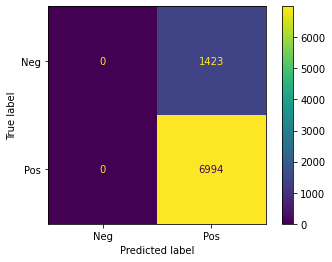

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_test_baseline_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
display.plot();

- Model correctly identified 6994 positive review texts as positive. (True Positive - TP)
- Model incorrectly identified 1423 negative review texts as positive. (False Positive - FP)

##### Logistic regression model

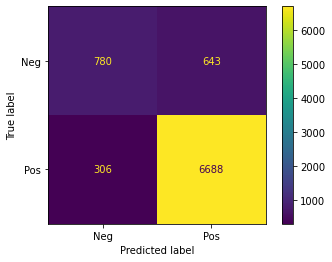

In [27]:
cm = confusion_matrix(y_test, y_test_log_reg_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
display.plot();

- Model correctly identified 780 negative review texts as negative. (True Negative - TN)
- Model correctly identified 6688 positive review texts as positive. (True Positive - TP)
- Model incorrectly identified 306 positive review texts as negative. (False Negative - FN)
- Model incorrectly identified 643 negative review texts as positive. (False Positive - FP)

#### Report

#### Accuracy

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
# Accuracy on baseline predictions
accuracy_score(y_test, y_test_baseline_predictions)

0.8309373886182726

In [30]:
# Accuracy on logisitical regression
accuracy_score(y_test, y_test_log_reg_predictions)

0.8872519900201972

#### Precision and recall

Use precision and recall positive formulas but change the N to P and P to N
- Precision for positive = TP/(TP+FP)
- Precision for negative = TN/(TN+FN)
- Recall for positive = TP/(TP+FN)
- Recall for negative = TN/(TN+FP)

***Baseline***
- Precision = 0/(0+0) = 0
- Recall = 0/(0+1423) = 0

***Logistic regression***
- Precision = 779/(779+305) = 779/1084 = 0.7186
- Recall = 779/(779+644) = 779/1423 = 0.547

#### f1-score

In [31]:
from sklearn.metrics import f1_score

# f1 score for baseline
f1_score(y_test, y_test_baseline_predictions, pos_label='Neg')

0.0

In [32]:
# f1-score for logistic regression
f1_score(y_test, y_test_log_reg_predictions, pos_label='Neg')

0.6217616580310881

#### Results

Baseline: {‘accuracy’:0.831, ‘precision’:0.0, ’recall’:0.0, ‘f1-score’:0.0}

Logisticregression: {‘accuracy’:0.887, ‘precision’:0.719, ’recall’:0.547, ‘f1-score’:0.621}

##### Accuracy Analysis

The high accuracy values of the logistic regression initially show that the accuracy of the prediction models is high however, the difference between the baseline and logistic regression accuracy is only 0.887 - 0.831 = 0.056 which isn't significant at all. This may be caused by the the significant imbalance between the positive to negative reviews which may have also led to misleading or inaccurate accuracy values.

##### f1-score analysis

As the Baseline f1-score reports the negative cases, the value is 0 for the baseline as it only has positive labels present for the label. This indicates that the f1-score is completely invalid for the baseline. The 0.621 f1-score for the logistic regression value displays a more accurate representation of the data by using the precision and recall values so takes into account the imbalances. An f1-score of 0.621 shows an okay performance.

## 5. Predict Data

The logistic regression model we built previously will be used to predict the 'predictdata' csv. We will do so by creating a bag of words with "predictdata" which will then be inputed into the predict function of the logistic regression. This prediction will then be added as a new column called "Model Prediction".

In [33]:
predicted = pd.read_csv(filepath_or_buffer='predictdata.csv')

In [34]:
# Clean the text using the previously used function so the texts are consistent with the data used to build the regression model.
predicted["Text"] = predicted["Text"].apply(clean_text)

In [35]:
# Define X(features)
X = predicted["Text"]

In [36]:
# create BOW for predicted data data
X_BOW = vectorizer.transform(X)

# predict using log_reg object
y_log_reg_predictions = log_reg.predict(X_BOW)

# view the predictions
y_log_reg_predictions

array(['Pos', 'Pos', 'Pos', 'Pos', 'Neg'], dtype=object)

In [37]:
predicted["Model Prediction"] = y_log_reg_predictions
predicted

,Id,Text,Model Prediction
0,1,the candy is tasty but they totally scam you o...,Pos
1,2,i had been looking for the violet candy with t...,Pos
2,3,these are very pricey so i only enjoy them now...,Pos
3,4,these candies have a mild flavor when compared...,Pos
4,5,this product is a bit pricey for the amt recei...,Neg


Above we can observe that the text has been predicted, we will now take a closer look to see if the Model Prediction is accurate.

### Evaluate Prediction

As there are only 5 text reviews, all rows will be investigated.

In [38]:
predicted.loc[0, "Text"]

'the candy is tasty but they totally scam you on the price the jar is only the size of a soda can and looks absolutely nothing like the picture i will not be buying this again if your gonna sell something that small make the price around'

From reading the above text we can observe that the review is negative, in particular the phrase "I will not be buying this again" clearly highlights this. This model was predicted to be a positive review which isn't correct, leading to a false positive.

In [39]:
predicted.loc[1, "Text"]

'i had been looking for the violet candy with the perfect balance of sweet and floral when i tried these the search has ended i am very pleased'

The positive is prediction is observed to be correct when reading the above review as the reviewer is pleased with their product, leading to a true positive result.

In [40]:
predicted.loc[2, "Text"]

'these are very pricey so i only enjoy them now and then as a treat but the flavor is wonderfull and the packaging is very nice would make a wonderfull gift to send to someone who likes such dainties i will order again when i run out truly a nice treat'

In [41]:
predicted.loc[3, "Text"]

"these candies have a mild flavor when compared with choward's violet candy but they are delicious nevertheless i will definitely purchase these candies again"

As the reviewer indicates their interest in purchasing again, we can observe that the result is also a true positive.

In [42]:
predicted.loc[4, "Text"]

'this product is a bit pricey for the amt received but i wanted the candy i chain sucked through paris and ifound it delivery was also quicker than i expected'

This review neither indicates a positive or negative result, this may be due to being neutral on the product which is a prediction that hasn't been accounted for.

In summary, we can observe that there are 3 true positives, 1 false positive and 1 unknown. 

## 6. Most frequent words

### Word Cloud

In [45]:
!pip install wordcloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  File 

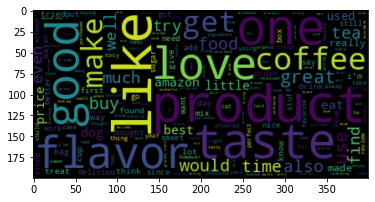

In [46]:
text = " ".join(X_train)
word_cloud = WordCloud(stopwords=set(stop_words)).generate(text)
plt.imshow(word_cloud, interpolation='bilinear');

We can observe the most frequently used words above, a significant majority are describing the product and are also positive which is expected as a large majority of of the review scores were positive.

### Identifying important words for predictions

In [47]:
# function adapted from https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
def plot_coefficients(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=90, ha='right')
    plt.xlabel("Important Words")
    plt.ylabel("Model Coefficient")
    plt.title("Important words with their model coefficient")
    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


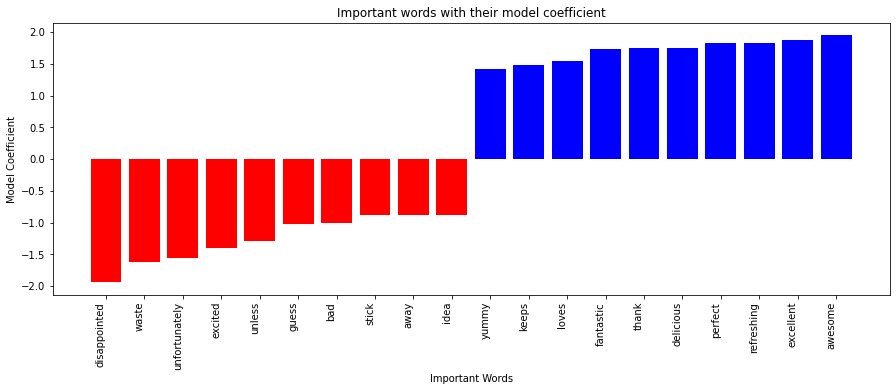

In [48]:
plot_coefficients(log_reg, vectorizer.get_feature_names())

Above we can observe which words were most frequent in positive and negative scores, resulting in being important factors for predicting labels. The blue bars show the top 10 words with positive model coefficient values and the red bars show the top 10 words with negative model coefficient values. 

## 7. Classifiction and unbalanced data

Unbalanced classification refers to a data set which has a disproportionate levels between observations. This can cause the data to be skewed and can result in misleading results in some classifier algorithm models.

The issue with unbalanced is that there can be insufficient patterns in the minority class to get a comparable representation compared to the majority class, leading to misleading result values. Re-sampling is the most adopted practice in dealing with unblanced data due to its simplicity, this process can be done by oversampling (making copies of the minority class to match the the majority) and undersampling (removing copies of the majority class to match the minority class).

References:
- https://statisticalhorizons.com/logistic-regression-for-rare-events/
- https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html